# Avocado Regression Problem

To find average price

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor

Importing Required modules

In [3]:
av=pd.read_csv(r"C:\Users\Minhaj\Downloads\avocado.csv.zip",index_col=0)

Importing dataset

In [4]:
av.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Sample of dataset

In [5]:
av.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

Daatypes of columns.Categorical,float and integer datatypes are present

In [6]:
av.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

Columns of dataset

In [7]:
av.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


Informations of dataset we can observe the memory usage of dataset.

In [8]:
av.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


Statistical measures of dataset

In [9]:
categorical=av[['Date','region','type']].copy()

Categorical Features of dataset stored in other dataframe

In [10]:
categorical

,Date,region,type
0,2015-12-27,Albany,conventional
1,2015-12-20,Albany,conventional
2,2015-12-13,Albany,conventional
3,2015-12-06,Albany,conventional
4,2015-11-29,Albany,conventional
...,...,...,...
7,2018-02-04,WestTexNewMexico,organic
8,2018-01-28,WestTexNewMexico,organic
9,2018-01-21,WestTexNewMexico,organic
10,2018-01-14,WestTexNewMexico,organic


Sample of categorical dataset

In [11]:
av.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

No missing values present in dataset

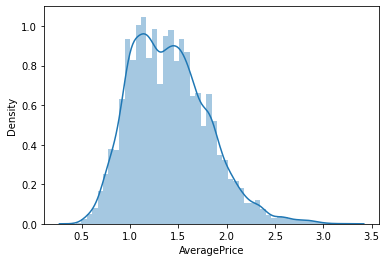

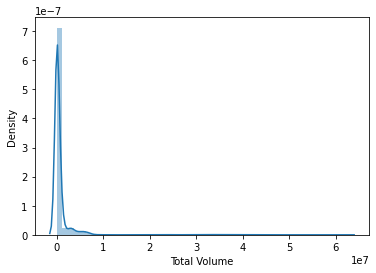

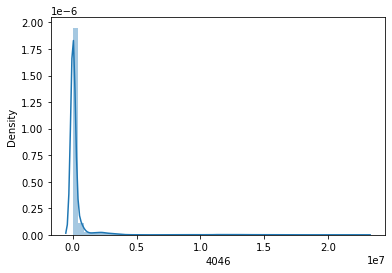

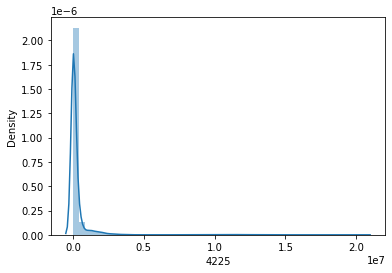

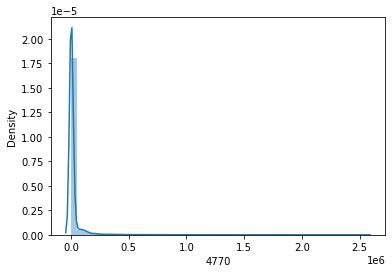

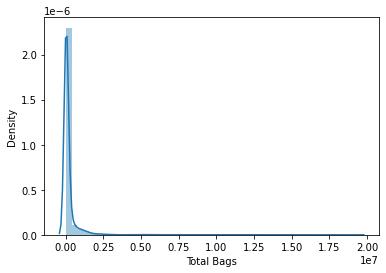

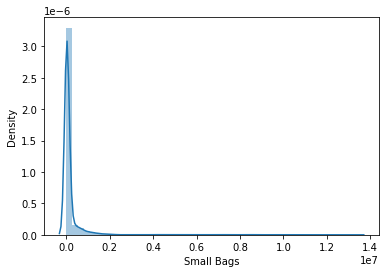

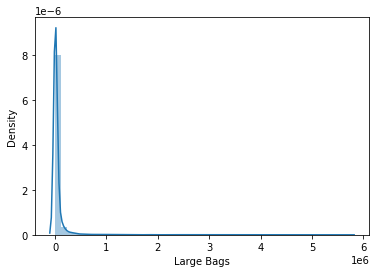

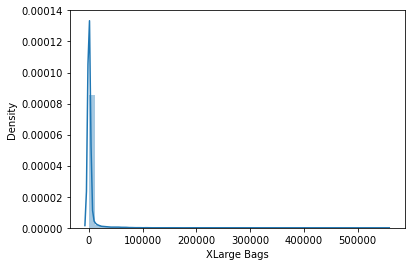

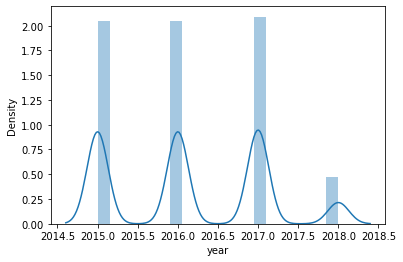

In [12]:
for i in av.describe().columns:
    sns.distplot(av[i])
    plt.show()

Datas are not normally distributed

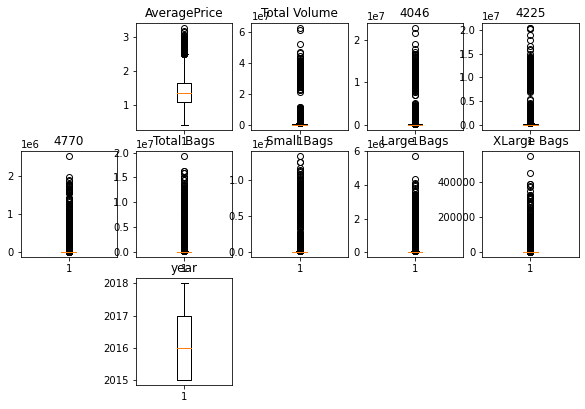

In [13]:
plt.figure(figsize=(10,9))
for i in range(len(av.columns)):
    if av.dtypes[i]!='object':
        plt.subplot(4,5,i+1)
        plt.boxplot(av[av.columns[i]])
        plt.title(av.columns[i])
plt.show()

We can observe detect the outliers

# Visualizations

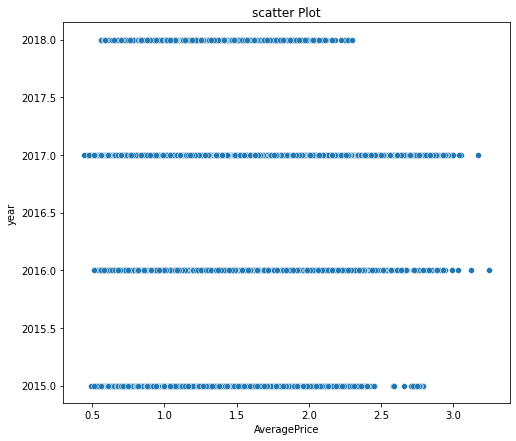

In [14]:
plt.figure(figsize=(8,7))
plt.xlabel("AveragePrice")
plt.ylabel("year")
plt.title("scatter Plot")
sns.scatterplot(x="AveragePrice",y="year",data=av)
plt.show()

Average price in every year,2016 have high averageprice

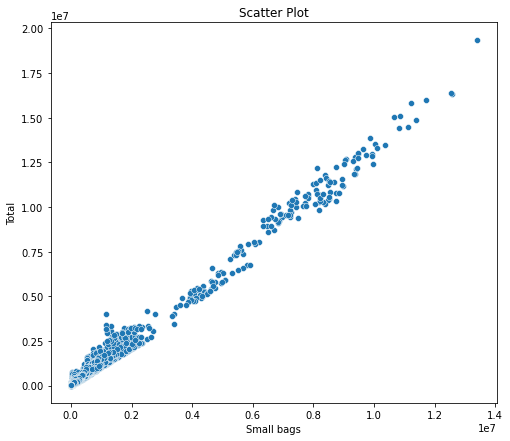

In [15]:
plt.figure(figsize=(8,7))
plt.xlabel("Small bags")
plt.ylabel("Total")
plt.title("Scatter Plot")
sns.scatterplot(x="Small Bags",y="Total Bags",data=av)
plt.show()

Most of number of total bags are small bags

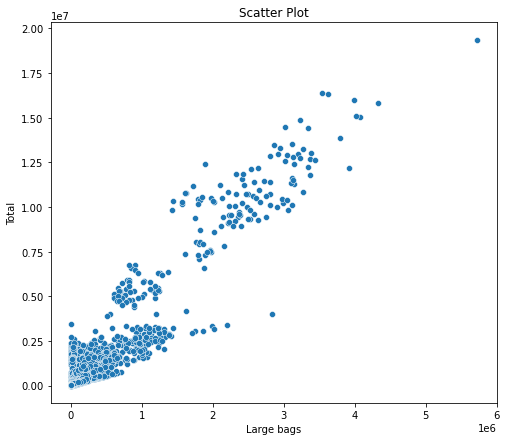

In [16]:
plt.figure(figsize=(8,7))
plt.xlabel("Large bags")
plt.ylabel("Total")
plt.title("Scatter Plot")
sns.scatterplot(x="Large Bags",y="Total Bags",data=av)
plt.show()

Total bags contains 0-2 large bags  

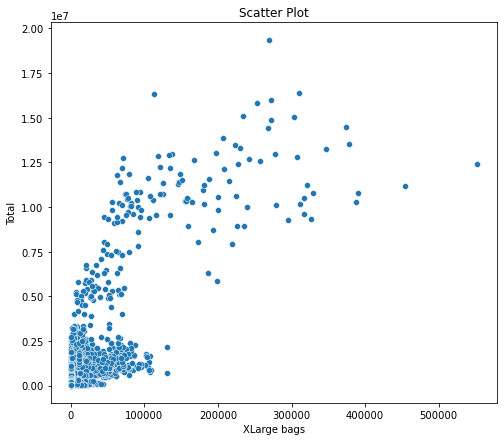

In [17]:
plt.figure(figsize=(8,7))
plt.xlabel("XLarge bags")
plt.ylabel("Total")
plt.title("Scatter Plot")
sns.scatterplot(x="XLarge Bags",y="Total Bags",data=av)
plt.show()

Relation between xlarge bags and total bags

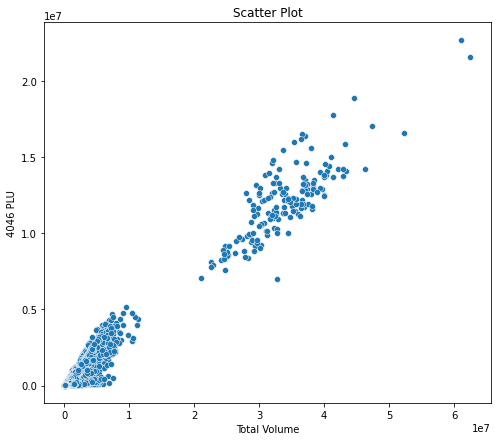

In [18]:
plt.figure(figsize=(8,7))
plt.xlabel("Total Volume")
plt.ylabel("4046 PLU")
plt.title("Scatter Plot")
sns.scatterplot(x="Total Volume",y="4046",data=av)
plt.show()

Relation between total bags and 4046 plu

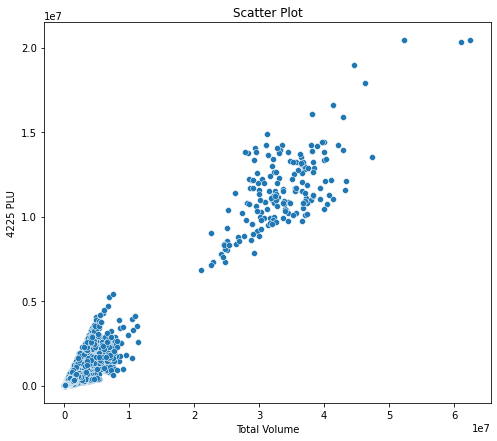

In [19]:
plt.figure(figsize=(8,7))
plt.xlabel("Total Volume")
plt.ylabel("4225 PLU")
plt.title("Scatter Plot")
sns.scatterplot(x="Total Volume",y="4225",data=av)
plt.show()

Relation between total volume and 4225 plu

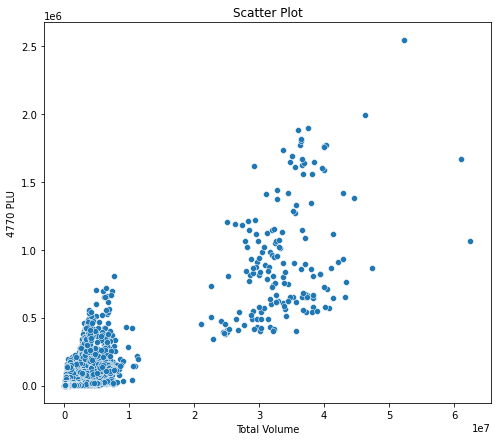

In [20]:
plt.figure(figsize=(8,7))
plt.xlabel("Total Volume")
plt.ylabel("4770 PLU")
plt.title("Scatter Plot")
sns.scatterplot(x="Total Volume",y="4770",data=av)
plt.show()

Relation between total volume and 4770 plu

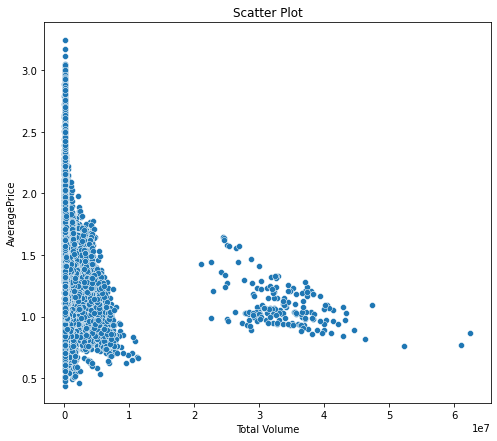

In [21]:
plt.figure(figsize=(8,7))
plt.xlabel("Total Volume")
plt.ylabel("AveragePrice")
plt.title("Scatter Plot")
sns.scatterplot(x="Total Volume",y="AveragePrice",data=av)
plt.show()

Average price and total volume

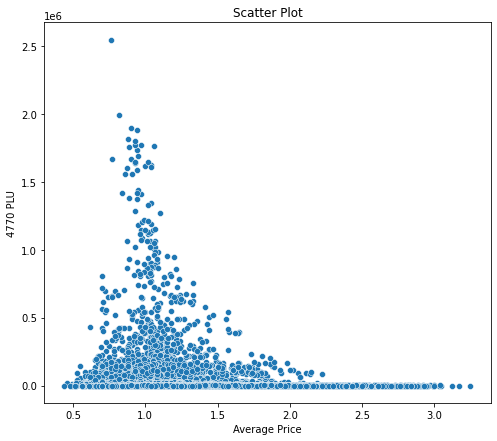

In [22]:
plt.figure(figsize=(8,7))
plt.xlabel("Average Price")
plt.ylabel("4770 PLU")
plt.title("Scatter Plot")
sns.scatterplot(x="AveragePrice",y="4770",data=av)
plt.show()

Average price and 4770 plu

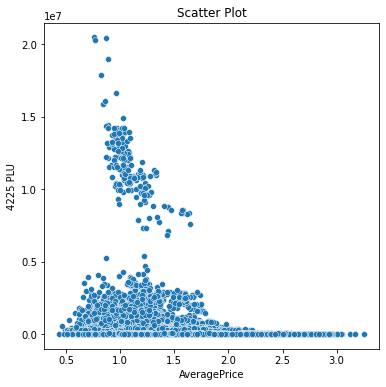

In [23]:
plt.figure(figsize=(6,6))
plt.xlabel("AveragePrice")
plt.ylabel("4225 PLU")
plt.title("Scatter Plot")
sns.scatterplot(x="AveragePrice",y="4225",data=av)
plt.show()

Relation between average price and 4225 plu

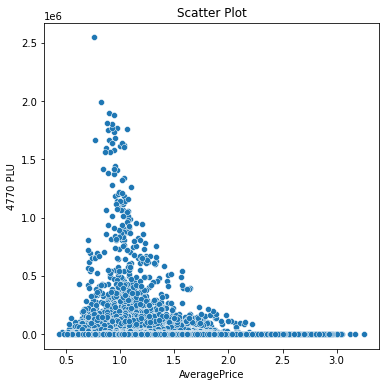

In [24]:
plt.figure(figsize=(6,6))
plt.xlabel("AveragePrice")
plt.ylabel("4770 PLU")
plt.title("Scatter Plot")
sns.scatterplot(x="AveragePrice",y="4770",data=av)
plt.show()

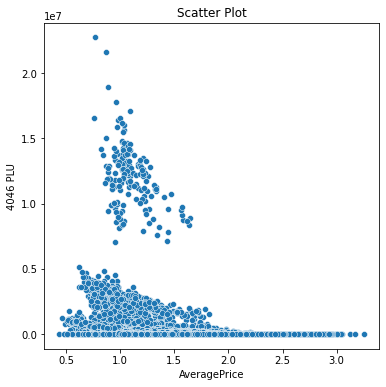

In [25]:
plt.figure(figsize=(6,6))
plt.xlabel("AveragePrice")
plt.ylabel("4046 PLU")
plt.title("Scatter Plot")
sns.scatterplot(x="AveragePrice",y="4046",data=av)
plt.show()

Relation between average price and 4046 plu

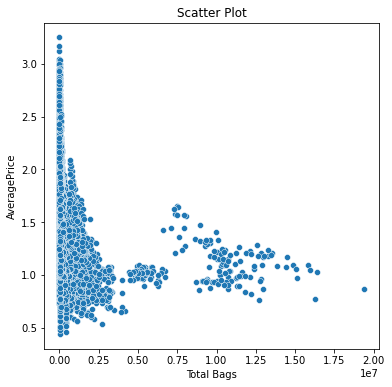

In [26]:
plt.figure(figsize=(6,6))
plt.xlabel("Total Bags")
plt.ylabel("AveragePrice")
plt.title("Scatter Plot")
sns.scatterplot(x="Total Bags",y="AveragePrice",data=av)
plt.show()

Total bags ad average price

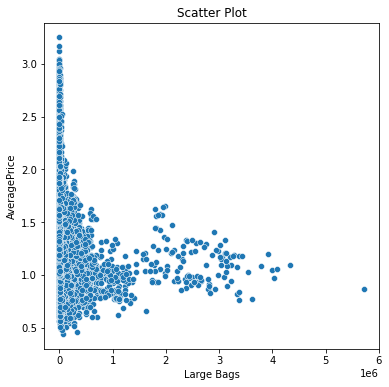

In [27]:
plt.figure(figsize=(6,6))
plt.xlabel("Large Bags")
plt.ylabel("AveragePrice")
plt.title("Scatter Plot")
sns.scatterplot(x="Large Bags",y="AveragePrice",data=av)
plt.show()

Relation between average prices and large bags

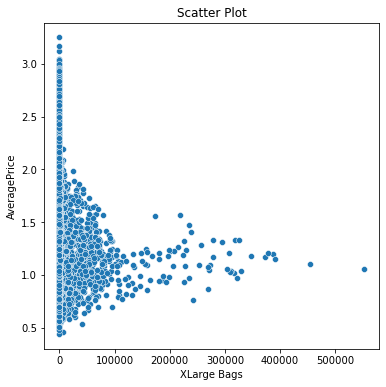

In [28]:
plt.figure(figsize=(6,6))
plt.xlabel("XLarge Bags")
plt.ylabel("AveragePrice")
plt.title("Scatter Plot")
sns.scatterplot(x="XLarge Bags",y="AveragePrice",data=av)
plt.show()

Relation between xlarge bags and average price

# Data Cleaning

In [29]:
import datetime as dt
av['Date'] = pd.to_datetime(av['Date'])

Date column imported to datetime module

In [30]:
av['Date'].dtype

dtype('<M8[ns]')

Early date column was object now it changed

In [31]:
av['month']=av['Date'].dt.month
av['day']=av['Date'].dt.day

Seperated month and day column seperately usng dataetime from Date column

In [32]:
av.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


Now we can observe two columns created month and day

In [33]:
av.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
month                    int64
day                      int64
dtype: object

datatypes of our columns

In [34]:
av.drop(['Date'],axis=1,inplace=True)

we have month ,day,year columns in data so we can drop Date column 

In [35]:
av.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'month', 'day'],
      dtype='object')

Now we can observe date column is dropped

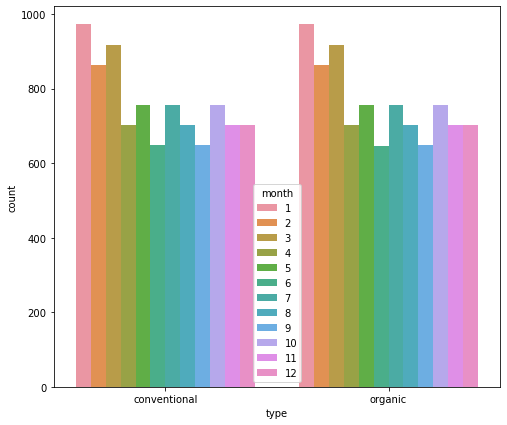

In [36]:
plt.figure(figsize=(8,7))
sns.countplot('type',data=av,hue='month')
plt.show()

In january both organic and conventional where sold

In [37]:
av[av['XLarge Bags']==0]['XLarge Bags'].value_counts()

0.0    12048
Name: XLarge Bags, dtype: int64

Most of the values of Xlarge bags contains 0 around 12048 values are zero

# Encoding

In [38]:
le=LabelEncoder()
av['region']=le.fit_transform(av['region'])

Labelled region column using label encoding

In [39]:
av=pd.get_dummies(av,columns=['type'])

Create dummies column for type

In [40]:
av.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,month,day,type_conventional,type_organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0,12,27,1,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0,12,20,1,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0,12,13,1,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,0,12,6,1,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,0,11,29,1,0


We can observe two columns where created newly

# Outliers Removal

In [41]:
from scipy.stats import zscore
z=np.abs(zscore(av))
av_new=av[(z<3).all(axis=1)]

Ouliers removed using zscore

In [42]:
av.shape

(18249, 15)

Shape of dataset before removing outliers

In [43]:
av_new.shape

(17651, 15)

Shape of dataset after removing ooutliers

In [44]:
print("Percentage of data loss after removing outliers:",(18249-17651)/18249*100)

Percentage of data loss after removing outliers: 3.276891884486821


3.27% of data loss it is ok

# Correlation

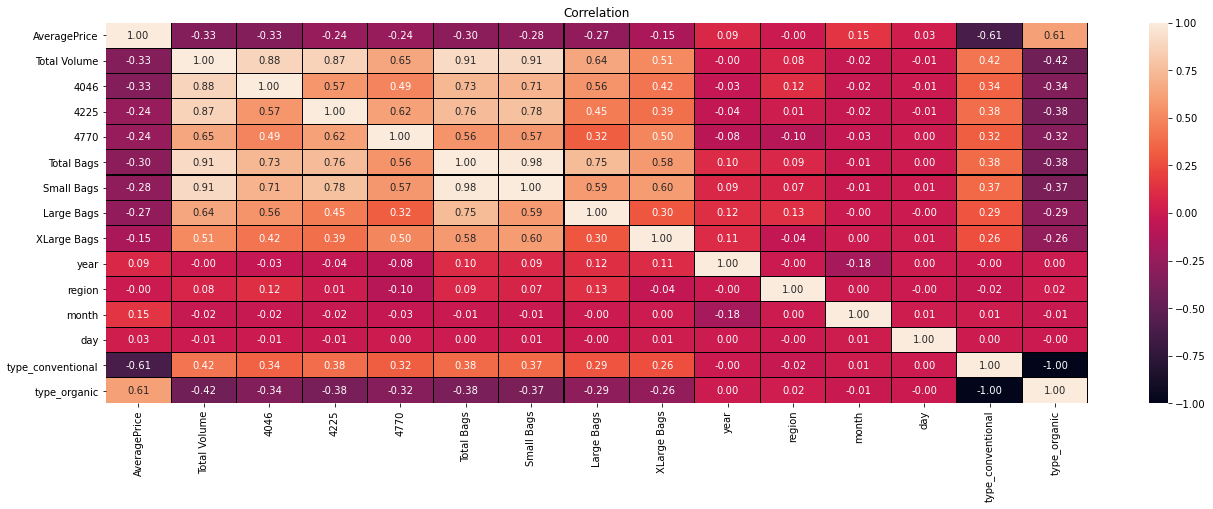

In [45]:
plt.figure(figsize=(22,7))
sns.heatmap(av_new.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")
plt.title("Correlation")
plt.show()

here our target column is average price region,day are less correlated to target column

In [46]:
av_new.drop(['region','day',],axis=1,inplace=True)

So we drop those columns which is less correlated

In [47]:
#av_new.drop(['year'],axis=1,inplace=True)

In [48]:
av_new.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,month,type_conventional,type_organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,1,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,1,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,1,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,1,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,1,0


We can observe two columns dropped

# Seperating features and target variable

In [49]:
x=av_new.drop('AveragePrice', axis = 1)
y = av_new['AveragePrice']

Features and target varibale seperated

In [50]:
x.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,month,type_conventional,type_organic
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,1,0
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,1,0
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,1,0
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,1,0
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,1,0


Sample data of features

In [51]:
pd.DataFrame(y)

,AveragePrice
0,1.33
1,1.35
2,0.93
3,1.08
4,1.28
...,...
7,1.63
8,1.71
9,1.87
10,1.93


Target variable

# Multicollinearity

# VIF

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['features']=x.columns
#checking values
vif

,vif,features
0,4.127904e+08,Total Volume
1,7.776948e+07,4046
2,6.410736e+07,4225
3,4.787304e+05,4770
4,1.924615e+13,Total Bags
5,1.275807e+13,Small Bags
6,1.290800e+12,Large Bags
7,6.647277e+09,XLarge Bags
8,1.131873e+00,year
9,1.039822e+00,month


checked multicollinearity variance inflation factor,multicollinearity is fine

# Skewness

In [53]:
x.skew()

Total Volume         3.767138
4046                 4.909848
4225                 4.455745
4770                 5.117170
Total Bags           4.066771
Small Bags           4.222706
Large Bags           5.053434
XLarge Bags          6.135607
year                 0.229976
month                0.107408
type_conventional    0.037741
type_organic        -0.037741
dtype: float64

Skewness is present

In [54]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

Skweness removed using yeo johnson

# Scaling

In [55]:
sc=StandardScaler()
x=sc.fit_transform(x)

Scaled features using standard scaler

# Model Building

In [56]:
#linear regression
lr=LinearRegression()
l=[]
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i},the training r2_score is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing r2_score is:- {r2_score(y_test,pred_test)}")
    print("\n")
    if round(r2_score(y_train,pred_train)*100)==round(r2_score(y_test,pred_test)*100):
        print("At random state",i,"model performs well")
        l.append(i)

At random state 0,the training r2_score is:- 0.5659097976872811
At random state 0,the testing r2_score is:- 0.5625036784241114


At random state 1,the training r2_score is:- 0.5658798305268371
At random state 1,the testing r2_score is:- 0.5627926358334817


At random state 2,the training r2_score is:- 0.570931051112425
At random state 2,the testing r2_score is:- 0.5423140349731028


At random state 3,the training r2_score is:- 0.5619248074663241
At random state 3,the testing r2_score is:- 0.578732311353179


At random state 4,the training r2_score is:- 0.5642163234228088
At random state 4,the testing r2_score is:- 0.5694410478421068


At random state 5,the training r2_score is:- 0.5618564869118081
At random state 5,the testing r2_score is:- 0.5782334825729735


At random state 6,the training r2_score is:- 0.5615046990362557
At random state 6,the testing r2_score is:- 0.579750537081656


At random state 7,the training r2_score is:- 0.5631760563718475
At random state 7,the testing r2_sco

At random state 68,the testing r2_score is:- 0.5706400239388094


At random state 69,the training r2_score is:- 0.5619918558761441
At random state 69,the testing r2_score is:- 0.5777765863886063


At random state 70,the training r2_score is:- 0.5670253822754423
At random state 70,the testing r2_score is:- 0.5582432175517437


At random state 71,the training r2_score is:- 0.5635750473012424
At random state 71,the testing r2_score is:- 0.5718315834319778


At random state 72,the training r2_score is:- 0.5649728576947978
At random state 72,the testing r2_score is:- 0.5659924098960161


At random state 73,the training r2_score is:- 0.5652777768198288
At random state 73,the testing r2_score is:- 0.5650315772067644


At random state 73 model performs well
At random state 74,the training r2_score is:- 0.5649438936746762
At random state 74,the testing r2_score is:- 0.566385849370058


At random state 75,the training r2_score is:- 0.5658444274834121
At random state 75,the testing r2_score is:- 

At random state 135,the testing r2_score is:- 0.5378553275048675


At random state 136,the training r2_score is:- 0.5658742193522693
At random state 136,the testing r2_score is:- 0.5627670756851684


At random state 137,the training r2_score is:- 0.5652760287553451
At random state 137,the testing r2_score is:- 0.565076191318919


At random state 137 model performs well
At random state 138,the training r2_score is:- 0.5651977190669892
At random state 138,the testing r2_score is:- 0.5649334971707614


At random state 139,the training r2_score is:- 0.5662863082523508
At random state 139,the testing r2_score is:- 0.5607014586175002


At random state 140,the training r2_score is:- 0.5630861884469414
At random state 140,the testing r2_score is:- 0.5739215990056488


At random state 141,the training r2_score is:- 0.5645236770490001
At random state 141,the testing r2_score is:- 0.5674121822642725


At random state 142,the training r2_score is:- 0.5664662289527557
At random state 142,the testin

Splitted into trained and test data, finding best random states

In [57]:
l

[24, 48, 73, 77, 137, 145, 174, 194]

List of best random states

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=198)
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print("r2 score",r2_score(y_test,predlr)*100)
print("Mean Absolute error",mean_absolute_error(y_test,predlr))
print("RMSE",np.sqrt(mean_squared_error(y_test,predlr)))

r2 score 56.64218155335774
Mean Absolute error 0.20353254286111755
RMSE 0.257458701970811


r2 score mse and rmse of the model linear regression

In [59]:
#knn regressor
kn=KNeighborsRegressor()
k=[]
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    kn.fit(x_train,y_train)
    pred_train=kn.predict(x_train)
    pred_test=kn.predict(x_test)
    print(f"At random state {i},the training r2_score is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing r2_score is:- {r2_score(y_test,pred_test)}")
    print("\n")
    if round(r2_score(y_train,pred_train)*100)==round(r2_score(y_test,pred_test)*100):
        print("At random state",i,"model performs well")
        k.append(i)

At random state 0,the training r2_score is:- 0.9163663003542967
At random state 0,the testing r2_score is:- 0.8679688896380137


At random state 1,the training r2_score is:- 0.915771105964672
At random state 1,the testing r2_score is:- 0.8631072343583923


At random state 2,the training r2_score is:- 0.9172117663054881
At random state 2,the testing r2_score is:- 0.860592259392588


At random state 3,the training r2_score is:- 0.9163954112557129
At random state 3,the testing r2_score is:- 0.8673393400672287


At random state 4,the training r2_score is:- 0.916335680890783
At random state 4,the testing r2_score is:- 0.8634376219609702


At random state 5,the training r2_score is:- 0.9152460329290834
At random state 5,the testing r2_score is:- 0.8701430457707191


At random state 6,the training r2_score is:- 0.915545459171072
At random state 6,the testing r2_score is:- 0.8694728071322103


At random state 7,the training r2_score is:- 0.9172176841335296
At random state 7,the testing r2_scor

At random state 63,the training r2_score is:- 0.9160983806557355
At random state 63,the testing r2_score is:- 0.8650485982652982


At random state 64,the training r2_score is:- 0.9173407237409944
At random state 64,the testing r2_score is:- 0.85369912217102


At random state 65,the training r2_score is:- 0.915897875148578
At random state 65,the testing r2_score is:- 0.8712101532942007


At random state 66,the training r2_score is:- 0.915988716149945
At random state 66,the testing r2_score is:- 0.8632091977361988


At random state 67,the training r2_score is:- 0.9142846235330396
At random state 67,the testing r2_score is:- 0.8711537992556735


At random state 68,the training r2_score is:- 0.9172423171977676
At random state 68,the testing r2_score is:- 0.863688473553851


At random state 69,the training r2_score is:- 0.9159752142255948
At random state 69,the testing r2_score is:- 0.8705809110079507


At random state 70,the training r2_score is:- 0.9149318142468585
At random state 70,the 

At random state 126,the training r2_score is:- 0.9159510321973762
At random state 126,the testing r2_score is:- 0.8626083105865028


At random state 127,the training r2_score is:- 0.9166591810450688
At random state 127,the testing r2_score is:- 0.8615411714125811


At random state 128,the training r2_score is:- 0.916249569392442
At random state 128,the testing r2_score is:- 0.8582409205640785


At random state 129,the training r2_score is:- 0.9161175440900579
At random state 129,the testing r2_score is:- 0.8581061741006255


At random state 130,the training r2_score is:- 0.9149169851525731
At random state 130,the testing r2_score is:- 0.8599746115569649


At random state 131,the training r2_score is:- 0.9144550232795063
At random state 131,the testing r2_score is:- 0.871214423139987


At random state 132,the training r2_score is:- 0.9163041743987964
At random state 132,the testing r2_score is:- 0.8677301441874268


At random state 133,the training r2_score is:- 0.9175959580605568
At ra

At random state 188,the training r2_score is:- 0.9161460892727682
At random state 188,the testing r2_score is:- 0.8647643270487695


At random state 189,the training r2_score is:- 0.9153492926420081
At random state 189,the testing r2_score is:- 0.8707065234583924


At random state 190,the training r2_score is:- 0.9171799805466789
At random state 190,the testing r2_score is:- 0.8612299760111599


At random state 191,the training r2_score is:- 0.9179043942616961
At random state 191,the testing r2_score is:- 0.8543410786257749


At random state 192,the training r2_score is:- 0.9153499125843301
At random state 192,the testing r2_score is:- 0.8626092825432948


At random state 193,the training r2_score is:- 0.9155875757313255
At random state 193,the testing r2_score is:- 0.869391098852595


At random state 194,the training r2_score is:- 0.9161732273516591
At random state 194,the testing r2_score is:- 0.8642281841511035


At random state 195,the training r2_score is:- 0.9135782908884341
At r

Splitted into trained and test data, finding best random states

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=182)
kn.fit(x_train,y_train)
predkn=kn.predict(x_test)
print("r2 score",r2_score(y_test,predkn)*100)
print("Mean Absolute error",mean_absolute_error(y_test,predkn))
print("RMSE",np.sqrt(mean_squared_error(y_test,predkn)))

r2 score 88.18481293808698
Mean Absolute error 0.09696233361653923
RMSE 0.13446664626516988


r2 score mse and rmse of the model kneighbors regressor

In [61]:
#dt regression
dt=DecisionTreeRegressor()
d=[]
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    dt.fit(x_train,y_train)
    pred_train=dt.predict(x_train)
    pred_test=dt.predict(x_test)
    print(f"At random state {i},the training r2_score is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing r2_score is:- {r2_score(y_test,pred_test)}")
    print("\n")
    if round(r2_score(y_train,pred_train)*100)==round(r2_score(y_test,pred_test)*100):
        print("At random state",i,"model performs well")
        d.append(i)

At random state 0,the training r2_score is:- 1.0
At random state 0,the testing r2_score is:- 0.730722066817286


At random state 1,the training r2_score is:- 1.0
At random state 1,the testing r2_score is:- 0.7269344504957789


At random state 2,the training r2_score is:- 1.0
At random state 2,the testing r2_score is:- 0.698285819086863


At random state 3,the training r2_score is:- 1.0
At random state 3,the testing r2_score is:- 0.7376368808262238


At random state 4,the training r2_score is:- 1.0
At random state 4,the testing r2_score is:- 0.7310956332914033


At random state 5,the training r2_score is:- 1.0
At random state 5,the testing r2_score is:- 0.7110774286445305


At random state 6,the training r2_score is:- 1.0
At random state 6,the testing r2_score is:- 0.7586776580084469


At random state 7,the training r2_score is:- 1.0
At random state 7,the testing r2_score is:- 0.7176207305588654


At random state 8,the training r2_score is:- 1.0
At random state 8,the testing r2_score is

At random state 71,the training r2_score is:- 1.0
At random state 71,the testing r2_score is:- 0.7180430160312489


At random state 72,the training r2_score is:- 1.0
At random state 72,the testing r2_score is:- 0.6961172204006529


At random state 73,the training r2_score is:- 1.0
At random state 73,the testing r2_score is:- 0.7117997646363543


At random state 74,the training r2_score is:- 1.0
At random state 74,the testing r2_score is:- 0.7070998342574482


At random state 75,the training r2_score is:- 1.0
At random state 75,the testing r2_score is:- 0.7187616219269468


At random state 76,the training r2_score is:- 1.0
At random state 76,the testing r2_score is:- 0.7015311257748946


At random state 77,the training r2_score is:- 1.0
At random state 77,the testing r2_score is:- 0.7049609602147272


At random state 78,the training r2_score is:- 1.0
At random state 78,the testing r2_score is:- 0.7246508190124554


At random state 79,the training r2_score is:- 1.0
At random state 79,the

At random state 141,the training r2_score is:- 1.0
At random state 141,the testing r2_score is:- 0.7379458513322528


At random state 142,the training r2_score is:- 1.0
At random state 142,the testing r2_score is:- 0.7291318265641502


At random state 143,the training r2_score is:- 1.0
At random state 143,the testing r2_score is:- 0.7098616430775317


At random state 144,the training r2_score is:- 1.0
At random state 144,the testing r2_score is:- 0.7171092637408651


At random state 145,the training r2_score is:- 1.0
At random state 145,the testing r2_score is:- 0.7460673170894336


At random state 146,the training r2_score is:- 1.0
At random state 146,the testing r2_score is:- 0.7255691137481375


At random state 147,the training r2_score is:- 1.0
At random state 147,the testing r2_score is:- 0.7302381234635102


At random state 148,the training r2_score is:- 1.0
At random state 148,the testing r2_score is:- 0.7358953351810118


At random state 149,the training r2_score is:- 1.0
At ra

Splitted into trained and test data, finding best random states

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=195)
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print("r2 score",r2_score(y_test,preddt)*100)
print("Mean Absolute error",mean_absolute_error(y_test,preddt))
print("RMSE",np.sqrt(mean_squared_error(y_test,preddt)))

r2 score 75.08462847856755
Mean Absolute error 0.1282866043613707
RMSE 0.19561809758290288


r2 score mse and rmse of the model decision tree regressor

In [63]:
#rf regression
rf=RandomForestRegressor()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=200)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("r2 score",r2_score(y_test,predrf)*100)
print("Mean Absolute error",mean_absolute_error(y_test,predrf))
print("RMSE",np.sqrt(mean_squared_error(y_test,predrf)))

r2 score 86.37642055959223
Mean Absolute error 0.09965780232228831
RMSE 0.14234356946207563


Splitted into train and test data, find r2 score and mse and rmse of random forest regressor

In [64]:
print("CV score and it's mean of KNearest Neighbors:",cross_val_score(kn,x,y,cv=8).mean(),"r2 score:",r2_score(y_test,predkn))
print("CV score and it's mean of Decision Tree Regressor:",cross_val_score(dt,x,y,cv=8).mean(),"r2 score:",r2_score(y_test,preddt))
print("CV score and it's mean of Linear Regression:",cross_val_score(lr,x,y,cv=8).mean(),"r2 score:",r2_score(y_test,predlr))
print("CV score and it's mean of Random Forest:",cross_val_score(rf,x,y,cv=8).mean(),"r2 score:",r2_score(y_test,predrf))

CV score and it's mean of KNearest Neighbors: 0.08025730434738784 r2 score: -0.8811137617167841
CV score and it's mean of Decision Tree Regressor: -0.3289857814039271 r2 score: -1.0179064468419914
CV score and it's mean of Linear Regression: 0.16436804306202352 r2 score: -0.5529938664511813
CV score and it's mean of Random Forest: 0.3131921336375444 r2 score: 0.8637642055959224


I choose random forest regressor because it have least differnce in cv core and r2score

# Hyper Parameter Tuning

In [65]:
parameter={'n_estimators': np.arange(25,50),
           'max_depth':np.arange(2,10),
          'criterion':['squared_error','absolute_error','poisson'],'min_samples_split':np.arange(2,9)}

Parameters stored in varibale

In [66]:
gv=GridSearchCV(rf,parameter,cv=6)

Calling instance variable for grid serach cv

In [67]:
#gv.fit(x_train,y_train)

In [69]:
best=RandomForestRegressor(n_estimators=100,max_depth=10,criterion='poisson',min_samples_split=11)
best.fit(x_train,y_train)
predbest=best.predict(x_test)
acc_b=(r2_score(y_test,predbest))
print(acc_b*100)

10.348473968054439


Apply best parameters

# Saving model

In [70]:
import joblib as jb
jb.dump(best,"Best.pkl")

['Best.pkl']

Model saved

# Conclusion

In [72]:
a=np.array(y_test)
predicted=np.array(best.predict(x_test))
hass=pd.DataFrame({"Original:":a,"Predicted":predicted},index=range(len(a)))
hass

,Original:,Predicted
0,1.04,1.376635
1,2.32,1.789207
2,1.01,1.376635
3,0.87,1.376635
4,1.92,1.742694
...,...,...
3526,1.06,1.376635
3527,1.93,1.874686
3528,1.62,1.376635
3529,1.87,1.843834


Original and predicted values